In [2]:
#! pip install xgboost

In [3]:
# First XGBoost model for Pima Indians dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('E:/DataScience_Study/3months/Data-Lit/week6-Supervised/XGBoost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.95%


C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Monitor performanceand early stopping
We can monitor performance of both test data while training model itself by passing early stoppage and setting verbose=True
also we can report on binary classification error on eval_set i.e [X_test, y_test] in model.fit()
We can use this evaluation to stop training once no further improvements have been made to the model.

In [13]:
# exmaple of early stopping
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = loadtxt('E:/DataScience_Study/3months/Data-Lit/week6-Supervised/XGBoost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# fit model on training data
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=eval_set, verbose=True)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[0]	validation_0-logloss:0.660186
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.634854
[2]	validation_0-logloss:0.61224
[3]	validation_0-logloss:0.593118
[4]	validation_0-logloss:0.578303
[5]	validation_0-logloss:0.564942
[6]	validation_0-logloss:0.555113
[7]	validation_0-logloss:0.54499
[8]	validation_0-logloss:0.539151
[9]	validation_0-logloss:0.531819
[10]	validation_0-logloss:0.526065
[11]	validation_0-logloss:0.519769
[12]	validation_0-logloss:0.514979
[13]	validation_0-logloss:0.50927
[14]	validation_0-logloss:0.506086
[15]	validation_0-logloss:0.503565
[16]	validation_0-logloss:0.503591
[17]	validation_0-logloss:0.500805
[18]	validation_0-logloss:0.497605
[19]	validation_0-logloss:0.495328
[20]	validation_0-logloss:0.494777
[21]	validation_0-logloss:0.494274
[22]	validation_0-logloss:0.493333
[23]	validation_0-logloss:0.492211
[24]	validation_0-logloss:0.491936
[25]	validation_0-logloss:0.490578
[26]	validation_0-logloss:0.490895


C:\Users\ikd\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Feature Importance with XGBoost

[0.08265495 0.34031582 0.05761176 0.08581445 0.07284074 0.14332853
 0.08399398 0.13343978]


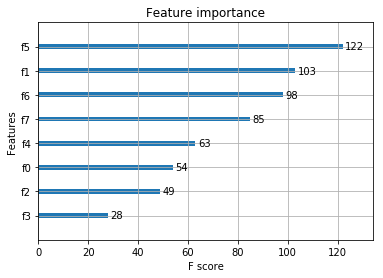

In [15]:

# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
# load data
dataset = loadtxt('E:/DataScience_Study/3months/Data-Lit/week6-Supervised/XGBoost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
y = dataset[:,8]
# fit model on training data
model = XGBClassifier()
model.fit(X, y)
print(model.feature_importances_) # automatically calculates feature importance of predictive model
# plot feature importance
plot_importance(model) # plot functions order by their importance
pyplot.show()

#They can also be used as the basis for automatic feature selection techniques.

# Gradiant boosting on our problem: apply using below parameters:
Learning rate ==  <=0.1 smaller values require nore trees
tree_depth == 2 to 8 as much not benifit seen in higher depth
subsample == 30% to 80% for training data

#good general approach:
Run default configurations review plots of learning curves on train and validation datasets
IF system is overlearning: decrease learning rate or increase number of trees.
IF system is underlearning: Increase learning rate or decrease number of trees

#suggests to set the number of trees to a target value such as 100 or 1000, then tune the learning rate to find the best model. This is an efficient strategy for quickly finding a good model.


# XGBoost Hyperparameter Tuning

In [16]:
# Tune learning_rate
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# load data
dataset = loadtxt('E:/DataScience_Study/3months/Data-Lit/week6-Supervised/XGBoost/pima-indians-diabetes.csv', delimiter=",")
# split data into X and y
X = dataset[:,0:8]
Y = dataset[:,8]
# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,0.5, 1, 10]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, Y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.483304 using {'learning_rate': 0.1}
-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}
-0.683432 (0.101979) with: {'learning_rate': 0.5}
-0.977163 (0.180315) with: {'learning_rate': 1}
-12.741830 (3.379840) with: {'learning_rate': 10}
